In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from my_utils import scale_dataset
from my_utils import plot_histograms
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
cols = ["times_pregnant", "plasma_glucose_conc", "diabp", "skin_thickness", "serum_insulin", "BMI", "dia_ped_func", "age", "class"]

In [3]:
df = pd.read_csv("pima-indians-diabetes.csv", names = cols)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   times_pregnant       768 non-null    int64  
 1   plasma_glucose_conc  768 non-null    int64  
 2   diabp                768 non-null    int64  
 3   skin_thickness       768 non-null    int64  
 4   serum_insulin        768 non-null    int64  
 5   BMI                  768 non-null    float64
 6   dia_ped_func         768 non-null    float64
 7   age                  768 non-null    int64  
 8   class                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


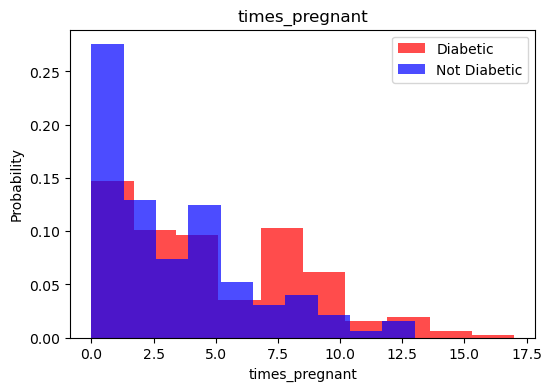

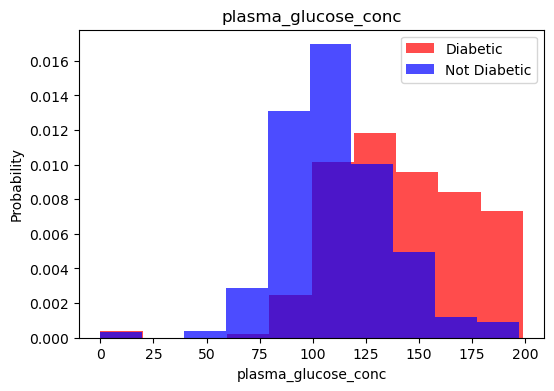

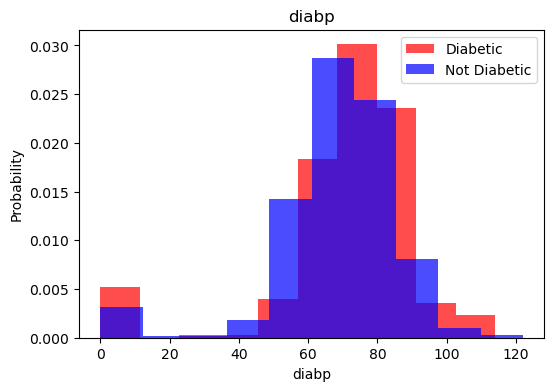

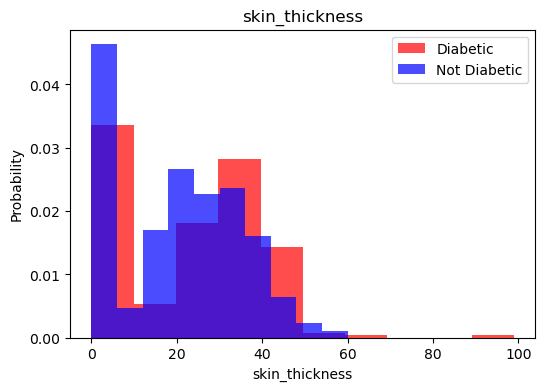

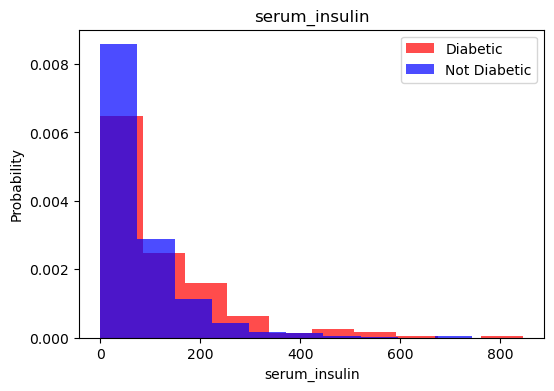

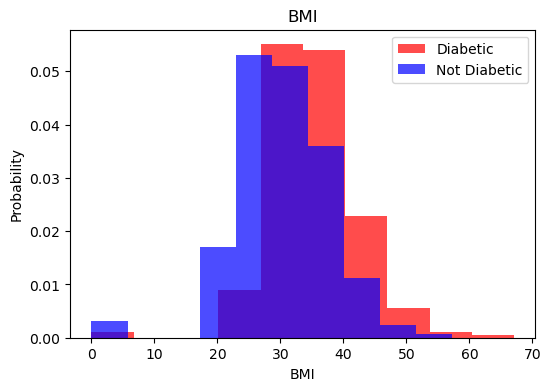

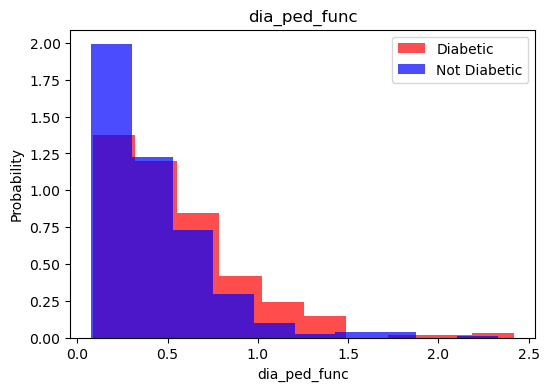

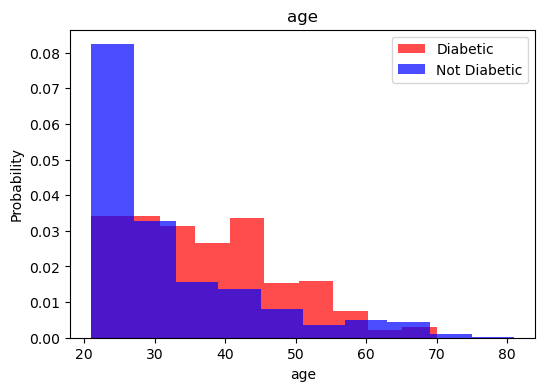

In [5]:
plot_histograms(df, cols[:-1])

In [6]:
print(len(df[df['class']==0]))
print(len(df[df['class']==1]))

500
268


In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\saifm\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# K Nearest Neighbors 

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
y_pred = knn_model.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       106
           1       0.47      0.56      0.51        48

    accuracy                           0.66       154
   macro avg       0.62      0.64      0.63       154
weighted avg       0.68      0.66      0.67       154



# Naive bayes Algo

In [13]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [14]:
y_pred_nb = nb_model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.75      0.80       106
           1       0.56      0.69      0.62        48

    accuracy                           0.73       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.75      0.73      0.74       154



# Logistic Regression

In [25]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)

In [26]:
y_pred_lr = lr_model.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       106
           1       0.55      0.73      0.62        48

    accuracy                           0.73       154
   macro avg       0.70      0.73      0.71       154
weighted avg       0.76      0.73      0.74       154

